# 1. MNIST

### 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [27]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from matplotlib import pyplot as plt # 학습과정 Loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가

In [3]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

5.0


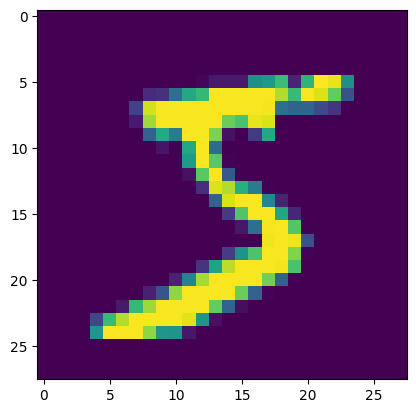

In [4]:
import matplotlib.pyplot as plt
print(data[0,0])
img = data[0, 1:].reshape(28, 28)
plt.imshow(img)

In [5]:
for row in data[1,1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

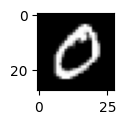

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [7]:
! pip install opencv-contrib-python

In [8]:
! pip show opencv-contrib-python

Name: opencv-contrib-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: numpy
Required-by: 


In [9]:
# 컬러사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE) # 흑백포맷으로 일기
print(image_gray.shape)
print(type(image_gray))

(646, 970)
<class 'numpy.ndarray'>


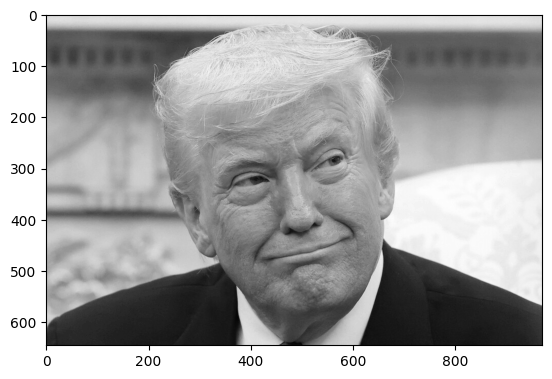

In [14]:
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 전처리

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [11]:
print(y_train[0])
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

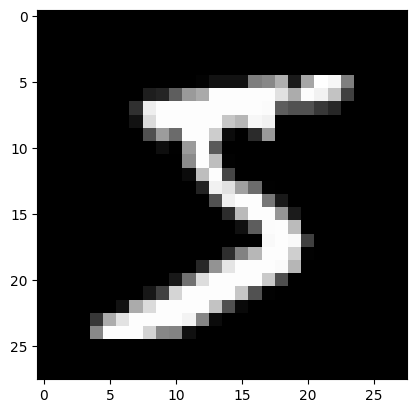

In [12]:
plt.imshow(X_train[0], cmap='gray')

In [13]:
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [14]:
# 학습셋(5만개:fit용), 검증셋(1만:fit용), 테스트셋(1만:평가용)

In [15]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [18]:
# 입력(독립)변수 (28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000,784).astype('float64')/255.0
val_X = X_val.reshape(10000, -1).astype('float64') / 255.0
test_X = X_test.reshape(10000, -1).astype('float64') / 255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [19]:
# 훈련셋5만개 -> 700개, 테스트셋1만개 -> 300개 추출
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
train_X.shape, y_train.shape, val_X.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

In [20]:
# 타겟(종속) 변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[2 7]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [21]:
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000,784).astype('float64')/255.0
val_X = X_val.reshape(10000, -1).astype('float64') / 255.0
test_X = X_test.reshape(10000, -1).astype('float64') / 255.0
##
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
# 타겟(종속) 변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2. 모델 구성

In [22]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 dense_2 (Dense)             (None, 20)                220       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [23]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
              optimizer = 'adam',
              metrics=['accuracy'])

# 4. 모델 학습

In [80]:
hist = model.fit(train_X, train_Y,
                 epochs=500,
                 batch_size=100,
                 validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 1s 53ms/step - loss: 2.2849 - accuracy: 0.1343 - val_loss: 2.2404 - val_accuracy: 0.2067
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 2.2225 - accuracy: 0.2057 - val_loss: 2.1825 - val_accuracy: 0.2200
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 2.1604 - accuracy: 0.2457 - val_loss: 2.1132 - val_accuracy: 0.2500
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 2.0865 - accuracy: 0.2629 - val_loss: 2.0318 - val_accuracy: 0.2967
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 2.0102 - accuracy: 0.2929 - val_loss: 1.9586 - val_accuracy: 0.3133
Epoch 6/500
7/7 [==============================] - 0s 11ms/step - loss: 1.9331 - accuracy: 0.3371 - val_loss: 1.8892 - val_accuracy: 0.3367
Epoch 7/500
7/7 [==============================] - 0s 9ms/step - loss: 1.8515 - accuracy: 0.3529 - val_loss: 1.8128 - val_accuracy: 0.3700
Epoch 8/500
7/7 [========

In [24]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: name 'hist' is not defined

In [86]:
test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=0)
print('테스트셋 정확도:', test_acc)


테스트셋 정확도: 0.8513000011444092


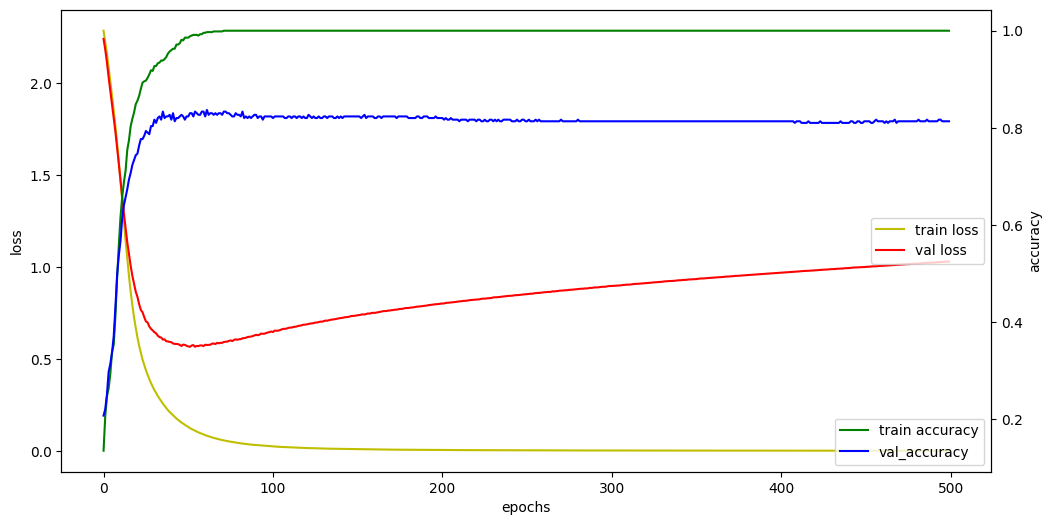

In [85]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [25]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 2.3478262424468994
accuracy : 0.10339999943971634


## 위 모델 (DNN) 의 accuracy 늘리기

Epoch 1/100
500/500 [==============================] - 4s 5ms/step - loss: 0.3152 - accuracy: 0.9054 - val_loss: 0.1305 - val_accuracy: 0.9614
Epoch 2/100
500/500 [==============================] - 2s 5ms/step - loss: 0.1116 - accuracy: 0.9667 - val_loss: 0.1311 - val_accuracy: 0.9608
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0772 - accuracy: 0.9761 - val_loss: 0.1032 - val_accuracy: 0.9713
Epoch 4/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0595 - accuracy: 0.9812 - val_loss: 0.1202 - val_accuracy: 0.9694
Epoch 5/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.1004 - val_accuracy: 0.9726
Epoch 6/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.1031 - val_accuracy: 0.9745
Epoch 7/100
500/500 [==============================] - 2s 5ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.1099 - val_accuracy: 0.9757

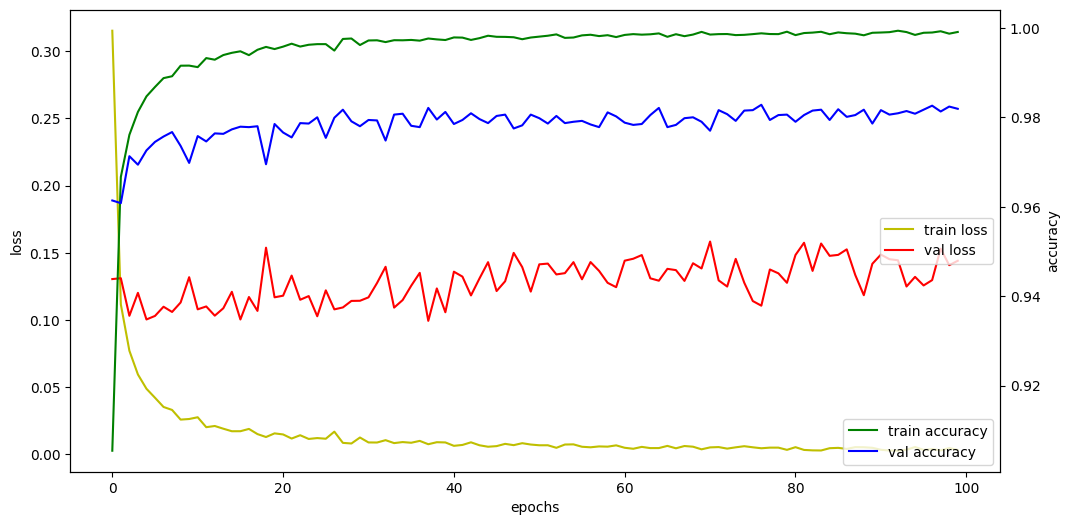

loss : 0.14820845425128937
accuracy : 0.9801999926567078
CPU times: total: 13min 7s
Wall time: 4min 56s


In [28]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 50000)
val_idx  = np.random.choice(10000, 10000)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

# 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])

hist = model.fit(train_X, train_Y,
                epochs=100,
                batch_size=100,
                validation_data=(val_X, val_Y))
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

In [29]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 0.14820845425128937
accuracy : 0.9801999926567078


In [30]:
# 실제값
test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [31]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [32]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,975,0,0,1,0,1,0,1,2,0
1,0,1127,3,1,0,0,1,1,2,0
2,6,0,1010,2,3,0,2,2,7,0
3,2,0,6,991,0,3,1,2,3,2
4,1,3,3,1,952,0,6,2,0,14
5,3,0,0,8,0,877,2,0,1,1
6,6,3,0,0,2,5,942,0,0,0
7,3,4,16,3,0,0,1,993,3,5
8,3,1,6,4,1,2,1,1,951,4


In [34]:
# 틀린 갯수:
10000- 10000*loss_and_metrics[1]

198.00007343292236

In [35]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('틀린 갯수 :', cnt)

틀린 갯수 : 198


In [36]:
model.save('model/08_mnist.h5')

# 콜백함수1 : 로그 출력

In [38]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [45]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있으니, 특정 에포크마다 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}) : # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1  # epoch마다 self.epoch값을 1씩 증가
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                  format(self.epoch, 
                        logs.get('loss'),
                        logs.get('accuracy', '-'),
                        logs.get('val_loss', '-'),
                        logs.get('val_accuracy', '-')
                  )
            )
        
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
customHistory = CustomHistory()
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수

epoch:10, loss:2.050157308578491, acc:0.23428571224212646, val_loss:2.0818536281585693, val_acc:0.20333333313465118
epoch:20, loss:1.914458155632019, acc:0.2542857229709625, val_loss:1.9722025394439697, val_acc:0.22333332896232605
epoch:30, loss:1.8182361125946045, acc:0.29428571462631226, val_loss:1.8966553211212158, val_acc:0.27000001072883606
epoch:40, loss:1.7291375398635864, acc:0.36142855882644653, val_loss:1.828485131263733, val_acc:0.2966666519641876
epoch:50, loss:1.642147183418274, acc:0.41285714507102966, val_loss:1.7628798484802246, val_acc:0.3566666543483734
CPU times: total: 4.61 s
Wall time: 3.72 s


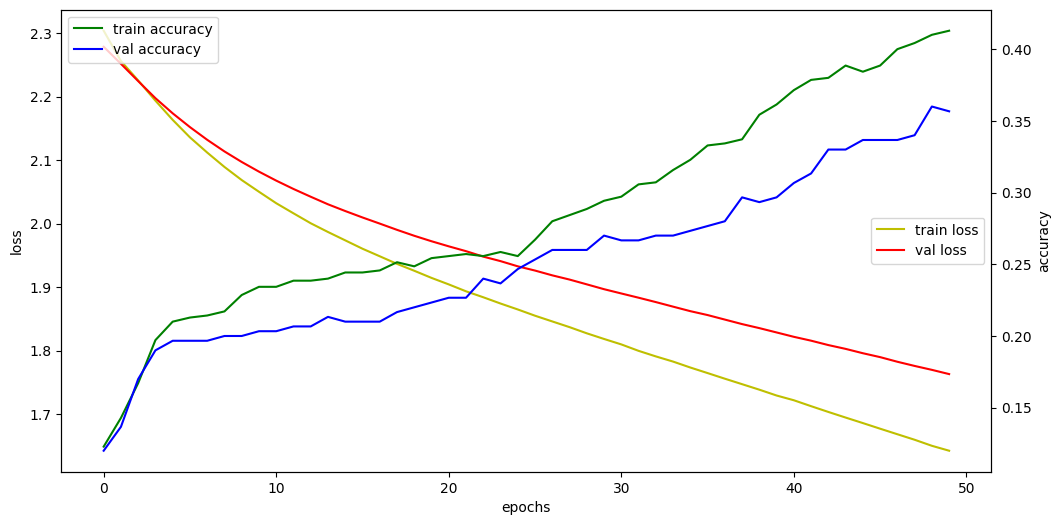

loss : 1.7717801332473755
accuracy : 0.3497999906539917


In [46]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

# ※ 콜백함수2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy 값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [ ]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlyStopping= EarlyStopping(monitor='val_accuracy', patience=2)
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlyStopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 1s 31ms/step - loss: 2.3062 - accuracy: 0.0957 - val_loss: 2.2655 - val_accuracy: 0.1333
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 2.2704 - accuracy: 0.1200 - val_loss: 2.2167 - val_accuracy: 0.1433
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 2.2257 - accuracy: 0.1414 - val_loss: 2.1734 - val_accuracy: 0.1467
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 2.1841 - accuracy: 0.1600 - val_loss: 2.1407 - val_accuracy: 0.1833
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 2.1499 - accuracy: 0.1914 - val_loss: 2.1129 - val_accuracy: 0.2100
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 2.1222 - accuracy: 0.1957 - val_loss: 2.0908 - val_accuracy: 0.2267
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 2.0978 - accuracy: 0.2114 - val_loss: 2.0708 - val_accuracy: 0.2233
Epoch 8/500
7/7 [========

# ※ 콜백함수3 : ModelCheck
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [50]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=10) 
# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(filepath=file, 
                            monitor='val_accuracy', # 모리터할 지표
                            save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                            mode = 'max', # 값이 클수록 저장
                            verbose=1 # 저장시 로그 출력
                            )

hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping, checkpoint]) # 콜백함수

Epoch 1/500
1/7 [===>..........................] - ETA: 4s - loss: 2.3254 - accuracy: 0.1000
Epoch 1: val_accuracy improved from -inf to 0.02333, saving model to ./model08\mnist-001-val0.0233.h5
7/7 [==============================] - 1s 36ms/step - loss: 2.3034 - accuracy: 0.0600 - val_loss: 2.2889 - val_accuracy: 0.0233
Epoch 2/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2878 - accuracy: 0.0600
Epoch 2: val_accuracy did not improve from 0.02333
7/7 [==============================] - 0s 9ms/step - loss: 2.2869 - accuracy: 0.0657 - val_loss: 2.2794 - val_accuracy: 0.0233
Epoch 3/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2912 - accuracy: 0.0900
Epoch 3: val_accuracy improved from 0.02333 to 0.06333, saving model to ./model08\mnist-003-val0.0633.h5
7/7 [==============================] - 0s 11ms/step - loss: 2.2718 - accuracy: 0.0786 - val_loss: 2.2610 - val_accuracy: 0.0633
Epoch 4/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2627 - accu

In [51]:
model.evaluate(val_X, val_Y)

10/10 [==============================] - 0s 2ms/step - loss: 1.6448 - accuracy: 0.4100


[1.644838809967041, 0.4099999964237213]